In [1]:
import numpy as np

Today will be a few more examples of hypothesis tests set up in different situations, trying to expand our experience a bit from the example we left off class with. 

## Small Sample Tests for Differences of Means

Our first example will simmultaneously demonstrate how we handle differences in means and also how we use the t-Distribution for a test with a small sample size.

This example is based on work my dad did as an industrial engineer:  The shop lead at an oven factory has developed two different procedures for making a new part that is needed in the new model. The question confronting us is which procedure is faster (and thus, assuming the same error rates, the one we should use).  The shop team procedes to make a set of the parts using the new procedures while being timed by the engineering team (note do not expect, if you are the person holding the stop watch in this situation, that the shop team will like you very much). The results are the following:

Procedure 1:  n_1 =11, $\bar{Y}_1 = 5.6 $ minutes, and $S_1 = 0.35 $ minutes.

Procedure 2:  n_2 = 9, $\bar{Y}_2 = 5.4 $ minutes, and $S_2 = 0.42 $ minutes.

We will need to assume that the populations have the same standard deviation.

Our hypothesis could be:

$H_0:$ the two procedures have the same mean assembly time $\mu_1 - \mu_2 \leq 0$ with a confidence of 99%. 

$H_a:$ the second procedure is faster: $\mu_1 - \mu_2 > 0$. 

### Pooled Standard Deviation

To start we need to combine the two sample standard deviations we have to give the pooled distribution. The way to remember this (I am now convinced) that it is coming from the weighted average of the sample variances weighted by the degrees of freedom:

In [3]:
n1 = 11
Ybar1 = 5.6
S1 = 0.35
n2 = 9
Ybar2 = 5.4
S2 = 0.42

In [4]:
Sp = np.sqrt( ((n1-1)*S1**2 + (n2-1)*S2**2 ) / (n1+n2-2) )
Sp

0.3826951208933236

Our result from the estimator work is that 

$$ T = \frac{ (\bar{Y}_1 - \bar{Y}_2) - (\mu_1 - \mu_2) }{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2} }} $$

fits a Student's t-Distribution with $n_1 + n_2 - 2$ degrees of freedom.

The probability of a Type I error is then:  $P(T > t_\star)$ with

$$ t_\star = \frac{ (\bar{Y}_1 - \bar{Y}_2) }{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2} }} $$

In [5]:
tstar = (Ybar1 - Ybar2) / Sp / np.sqrt( 1/n1 + 1/n2)
tstar

1.1627321199889935

In [6]:
from scipy.stats import t

In [7]:
pvalue = 1 - t.cdf(tstar, n1+n2-2)
pvalue

0.1300611529709157

Our p-value is coming in at 13%, well above the target confidence and we would say **we have insufficient evidence to reject the null hypothesis**.

### Rejection Region

Forgetting about the specific outcome, we can also ask what the rejection region would be:



In [8]:
# the t-value we would need to reject the null hypothesis:

t_alpha = t.ppf(0.99, n1+n2-2)
t_alpha

2.552379630179453

In [9]:
# working backwards to the corresponding d_alpha, the difference between Y_1 and Y_2 we would need

d_alpha = t_alpha*Sp * np.sqrt(1/n1 + 1/n2)
d_alpha

0.4390314133927263

Choosing a significance of 0.5 minutes then we would estimate the probability of a Type 2 Error to be:

In [10]:
beta = t.cdf( (d_alpha - 0.5) / Sp / np.sqrt(1/n1 + 1/n2), n1+n2-2)
beta

0.3635598671550872

Note that this is the case and there is nothing to do unless we are willing to repeat the experiment. Repeating the experiment, using $S_p$ as our *a priori* estimate, we could identify a choice for $n_1$ and $n_2$ that minimize $\beta$.

### Assumptions

Note that the $T$ distribution comes with some assumptions, namely that the sample has been drawn from two normally distributed variables. This may or may not be true. A test is called a **Robust Statistical Test** if small departures from the assumptions, like the distribution of times not being exactly normal, do not change the conclusions. Provided that the p-value was not right at $\alpha$ or that the $\bar{Y}_1 - \bar{Y}_2$ was not right on the decision boundary, we do not expect small changes to have a big effect in our conclusion or error estimates. 

The two sample test is also robust on the assumption that the population standard deviations are identical:  meaning if they are not exactly equal we do not expect it to change our conclusions.


## Two Tail Tests

Two tail tests arise when our alternative hypothesis takes the form of assuming the mean is different from some value, not bigger or a smaller than some value. In the example above if we rephrased the question of:  Is their evidence that the assembly times for the two procedures is different?  We would want to use a two tailed test.

Here we distribute the allowed Type I error across both the left and right tails effectively halving the value we use to compute $t_\alpha$:

In [11]:
# the t-values for a two tailed test

t_alpha = t.ppf(0.995, n1+n2-2)
- t_alpha, t_alpha

(-2.878440472713585, 2.878440472713585)

Then we can work backwards to find the rejection region which will now have to pieces a $d < d_{-\alpha}$ and a $d > d_\alpha$:

In [12]:
-t_alpha*Sp*np.sqrt(1/n1+1/n2), t_alpha*Sp*np.sqrt(1/n1+1/n2)

(-0.49511670370658084, 0.49511670370658084)

The probability of a Type II error in this case is then the mass under the alternative distribution of this interval. Well except again this estimate is hamstrung in that we need to assume a particular alternative difference of the means.

In [13]:
l = (-t_alpha*Sp*np.sqrt(1/n1+1/n2) + 0.5)/Sp / np.sqrt(1/n1+1/n2)
u = (t_alpha*Sp*np.sqrt(1/n1+1/n2) + 0.5)/Sp/np.sqrt(1/n1 + 1/n2)

beta = t.cdf(u, n1+n2-2) - t.cdf(l, n1+n2-2)
beta

0.4888230451599327

Again for this problem this is not great. However if we can repeat the experiment then we can ask how large $n_1$ and $n_2$ should be so that the $\beta$ is small enough.

## Testing Hypothesis for Variances

The procedure can be adpated to any distribution and in particular we can use it to address questions about the variance of a population.

The key idea is that we have, for a sample drawn form a normal distribution:

$$\chi^2 = \frac{(n-1) S^2}{\sigma_0^2} $$

A cholesterol test read properly should give a variance of no more than $0.8 (\mbox{mg/L})^2$ on samples from the same blood draw. A new technician in the lab is being evaluated on the procedure and are asked to run the test 5 times. 

What is the maximum amount of sample variance we should allow for them to pass the test with 99% confidence?

- $H_0:$ is that $\sigma_0^2 \leq 0.8$

- $H_a:$ is that $\sigma_a^2 > 0.8$

It is reasonable to assume that the test, run on a single blood draw, gives results that are normally distributed with a mean at the true cholesterol level, and therefore the ratio above will fit the $\chi^2$ distribution.

The question posed is look for an uppder tail test:  What is the probability with a fixed $\sigma_0^2$ that the $S^2$ would be very large?




In [14]:
from scipy.stats import chi2

In [19]:
chi2_alpha = chi2.ppf(0.99, 4)
chi2_alpha

13.276704135987622

With this we then work backwards to a decsion boundary for $S^2$:

In [16]:
chi2_alpha * 0.8 / 4

2.6553408271975245

Note why we did this:  We expect with only 5 items in our sample a significant variance before we would reject the null hypothesis!

## Hypothesis about 2 population variances

For the manufacturing example we started with, one of our assumptions was that the population variances were equal. Can we conclude that they are in fact equal?

A reminder of the result: 

Procedure 1:  n_1 =11, and $S_1 = 0.35 $ minutes.

Procedure 2:  n_1 = 9, and $S_2 = 0.42 $ minutes.

Noting that it will not matter what the means are.

What we know is that the statistic:

$$ F = \frac{S_1^2 \sigma_2^2}{S_2^2 \sigma_1^2} $$

Satisfies an F-distribution with $n_1-1, n_2-1$ paired degrees of freedom.

Under our null hypothesis we are asking if the fact that $S_1 < S_2$ can be explained by randomness if the $\sigma_1 = \sigma_2$? 

The p-value will be the $P( F < f_\star)$ where

In [20]:
f_star = 0.35**2 / 0.42**2
f_star

0.6944444444444444

In [21]:
from scipy.stats import f

In [22]:
1- f.cdf(f_star, 10, 8)

0.7108802682989086

In [23]:
f.cdf(f_star, 10, 8)

0.2891197317010914

So we do not have sufficient evidence to conclude that the variances are not equal. Let's check where the decision boundary would be for a two-tailed test with confidence of 0.95. We need to find left and right boundaries such that 

$$P ( F < a) < 0.025; \quad \mbox{and} P(F > b) < 0.025 $$

In [24]:
a = f.ppf(0.025, 10, 8)
b = f.ppf(0.975, 10, 8)
a, b

(0.2594107151696225, 4.295126960172586)

In [25]:
# Check that the density between a and b is our 0.95

f.cdf(b, 10, 8) - f.cdf(a, 10, 8)

0.95

So our decision boundary is then that 

$$ S_1^2 < a S_2^2 $$ or $$ S_1^2 > b S_2^2$$



In [26]:
a*S2**2, b*S2**2

(0.045760050155921404, 0.757660395774444)

In [27]:
S1**2

0.12249999999999998

### Discussion

The tests for variances are **not robust**.  They are very sensitive to departures from the normal distribution for the population being studied. To my thinking, this is related to degree of variance they predict we will see from our samples. 

# Other Approaches


## Maximum Likliehood 

Another way to approach hypothesis testing is to compute a *Likliehood of the Sample Given the Parameter*:  

$$ L(y_1, y_2, \dots, y_n | \theta_0) $$

we are then trying to compare this to

$$ L(y_1, y_2, \dots, y_n | \theta_a) $$

and decide which outcome was most likely, and our conclusion would then be that that was the corresponding correct value for $\theta$. 

We will come back to this approach later when we introduce *Bayesian Inference* at the end of the class.

## Resampling

Another approach, not included in our textbook, is designed to exploit the situation we now frequently find of having lots of data. The idea is this:  Given a large set of data we can experiment on the variation of our test statistic by sampling from the data itself. This approach is introducing some randomness in how the sampling is done, and it captures the information the data has about the variation. It relies on having enough data to give a large domain of resamples.





In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [30]:
baseball_url = 'https://drive.google.com/uc?export=download&id=1-4lEGbDkQi8Wy6h940tpbiMmcfQFxq8E'
baseball = pd.read_csv(baseball_url)
baseball

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [31]:
pos = set(baseball.loc[:, 'Position'])

# We are going to recode the position feature to be 'Pitcher' or 'NotPitcher'. It is convenient to do this using
# a dictionary. If you are interested this is the Python for doing this kind of work.

# if not you can just ignore this

recode_pitch = { x:'Pitcher' for x in pos if 'Pitcher' in x }
# First for any position which has the word Pitcher, we recode that to just be Pitcher.

recode_pitch.update({ x:'NotPitcher' for x in pos if not 'Pitcher' in x})
# Then recode the ones that do not use the word Pitcher

# Python lets us update dictionaries.
recode_pitch

{'Catcher': 'NotPitcher',
 'Designated_Hitter': 'NotPitcher',
 'First_Baseman': 'NotPitcher',
 'Outfielder': 'NotPitcher',
 'Relief_Pitcher': 'Pitcher',
 'Second_Baseman': 'NotPitcher',
 'Shortstop': 'NotPitcher',
 'Starting_Pitcher': 'Pitcher',
 'Third_Baseman': 'NotPitcher'}

In [32]:
# So now fix the column
baseball.loc[:, 'Position'] = baseball.loc[:, 'Position'].map(recode_pitch)

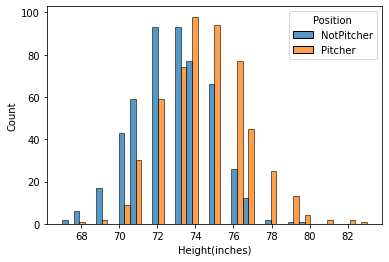

In [33]:
# Seaborn is a data visualization package that is useful for plotting complicated data 
# in this case we can put the histograms of the heights of the players side by side by position

sns.histplot(data = baseball, x='Height(inches)', hue='Position', multiple='dodge')

So a very natural proposition is then that Pitchers are taller on the average than non-Pitchers (there are some physiological reasons that this seems reasonable). Let's test this hypothesis using the techniques we've been learning. First we note that the sample sizes are nice and large:

In [ ]:
baseball = baseball.loc[:, ['Position', 'Height(inches)', 'Age']]
baseball.groupby('Position').count()

In [ ]:
import random

## Random Sampling - Our Hypothesis: The mean height of pitchers at 74.5 inches is taller than non-Pitchers

The null hypothesis is that the sample of Pitchers being taller was just a result of randomly choosing 536 players out of 1034 ballplayers and just ending up with the taller ones. To see if this could actually be the case, what we are going to do is select sets of 536 ball players from our sample over and over computing the mean each time, and see how often we end up with a mean of 74.5 inches or more.

In [ ]:
# Let's make this a function so we don't have to retype it all the time

size = 536

def experiment(N, s = size, population = list(baseball.loc[:, 'Height(inches)'])):
    # N is the number of times to run the experiment
    # s is a variable that will let us change the size of the sample to pull, the default value size is the number
    # of petitions that Nixon received

    result = pd.DataFrame([], columns = ['Mean Heights']) # Make a dataframe to catalogue the results
    # Note I drop the size, because every sample will have the same size.
    
    for k in range(N):
        
        # random.choices(population, size)  
        # use this command if we are sampling from the population with replacement
    
        sample = np.mean(random.sample(population, s))
        # use this command if we are sampling from the population without replacement
    
        row = pd.DataFrame([sample], 
                       index = ['Mean Heights']).transpose()
    
        result = result.append(row)
    
    return result.reset_index().iloc[:, 1:]

In [ ]:
result = experiment(1000)
sns.histplot(data=result, x='Mean Heights')

In [ ]:
sns.boxplot(data=result, x='Mean Heights')

And we see that it never happened!  Which is actually remarkable given that there are many more pitchers than not pitchers.

## Let's do the same operation with Age

And at the same time look at the Median Age!

In [ ]:
baseball.groupby('Position').median()

In [ ]:

# Let's make this a function so we don't have to retype it all the time

size = 536

def experiment(N, s = size, population = list(baseball.loc[:, 'Age'])):
    # N is the number of times to run the experiment
    # s is a variable that will let us change the size of the sample to pull, the default value size is the number
    # of petitions that Nixon received

    result = pd.DataFrame([], columns = ['Median Age']) # Make a dataframe to catalogue the results
    # Note I drop the size, because every sample will have the same size.
    
    for k in range(N):
        
        # random.choices(population, size)  
        # use this command if we are sampling from the population with replacement
    
        sample = np.median(random.sample(population, s))
        # use this command if we are sampling from the population without replacement
    
        row = pd.DataFrame([sample], 
                       index = ['Median Age']).transpose()
    
        result = result.append(row)
    
    return result.reset_index().iloc[:, 1:]

In [ ]:
result = experiment(1000)
sns.histplot(data=result, x='Median Age')

In [ ]:
sns.boxplot(data=result, x='Median Age')

And we see that a Median Age of 27.52 fits into the first tail of the experiment, and so there is a small proportion of times we expect to see that result come out. We can compute the exact proportion by:

In [ ]:
sum(result.loc[:, 'Median Age'] <= 27.52 )/1000

Note that we do not have other tools for studying the Median Age of the sample unless we know the underlying distribution the sample is pulled from. We can guess that the underlying sample here is normal, and we also would suspect that we would have a robust test, however resampling gives us a method of studying the same question without having to worry about those assumptions.

So what is the catch?  Well we need to know that the sample we do have is random and representative. For this problem there is not much to be worried about, but we would want to be especially careful if one of our populations is much smaller than the other.